<br>Debug
<br>注意第二个初始条件函数h(x)只能是在第一个初始条件函数w(x)的基础上加减a*deltat(或与之大小相等的数)即h(x)=w(x+/-deltat*a)
<br>Bug
<br>因为固定了alpha=1，因此当a较小时deltat可能较大,从而导致计算结果不精确,不过好在t的精度(deltat)与x的精度(deltax)成正比
<br>PRO
<br>用傅里叶变换压缩数据量与计算量,当计算范围和计算精度都很大时,数据量会很大,这样计算时间会很长,采用傅里叶变换压缩数据量可以大幅度减小计算时间,其奥<br>妙在于用前几个本征函数就能对整个函数实现较好的模拟
<br>如何兼容周期性边界条件
<br>NEW
<br>只有选择恰当的参数才能使程序收敛到一个较好的结果,参数选地不好即使程序正确效果也不好甚至出现错误
<br>Todo
<br>做动图

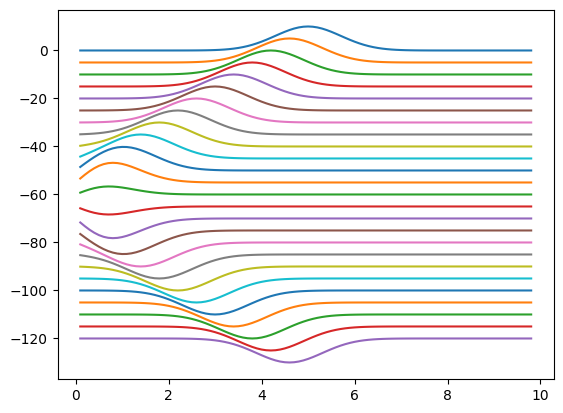

In [2]:
import numpy as np
#初始化数据
a=1#波的移动速度
xN,tN=10,10
x0,t0=0,0
deltax=0.1
deltat=np.sqrt(deltax**2/a**2)#这样alpha始终为1,不会发生指数爆炸,a可取任意值
xlist=np.arange(x0,xN,deltax)
tlist=np.arange(t0,tN,deltat)
Nx,Nt=len(xlist),len(tlist)
#设置参数
vdata=deltax/deltat
alpha=a**2/vdata**2
beta=2*(1-alpha)
Lamda=np.zeros((Nx-2,Nx-2))
def Boundary(t):
    '''边界条件函数'''
    f=0
    g=0
    return f,g
def Initial(x):
    '''初始条件函数'''
    fun=lambda x:np.e**(-x**2)*10
    w=fun(x-5)
    h=fun(x-5+a*deltat)#第二个时刻的加减a*deltat决定向左或向右移动
    return w,h
#创建条纹矩阵Lamda
for i in range(Nx-3):
    Lamda[i,i],Lamda[i,i+1],Lamda[i+1,i]=beta,alpha,alpha
Lamda[Nx-3,Nx-3]=beta
#设置Omega矩阵
Omegamat=np.zeros((Nx-2,Nt))
Omegamat[0,:],Omegamat[-1,:]=Boundary(tlist)
#计算主函数U矩阵
Umat=np.zeros((Nx-2,Nt))
Umat[:,0],Umat[:,1]=Initial(xlist[1:Nx-1])
for j in range(2,Nt):
    Umat[:,j]=Lamda@Umat[:,j-1]+alpha*Omegamat[:,j-1]-Umat[:,j-2]
import matplotlib.pyplot as plt
interval=4
for i in range(0,Nt//interval):
    plt.plot(xlist[1:Nx-1],Umat[:,interval*i]-i*5)#每隔interval个点画一次
plt.show()